In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("/content/heartdataset.csv")

In [3]:
print(data.shape)
print(data.head())
print(data.info())


(918, 14)
  "Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  "40      M           ATA        140          289          0     Normal   
1  "49      F           NAP        160          180          0     Normal   
2  "37      M           ATA        130          283          0         ST   
3  "48      F           ASY        138          214          0     Normal   
4  "54      M           NAP        150          195          0     Normal   

   MaxHR Exercise induced angina  Oldpeak ST_Slope Obesity Diabetes  \
0    172                       N      0.0       Up     Yes       No   
1    156                       N      1.0     Flat      No       No   
2     98                       N      0.0       Up     Yes       No   
3    108                       Y      1.5     Flat      No      Yes   
4    122                       N      0.0       Up      No      Yes   

  Risk of AHD  
0          0"  
1          1"  
2          0"  
3          1"  
4          0"  
<cla

In [4]:
#1. Fix column name
data.rename(columns={'"Age': 'Age'}, inplace=True)

In [5]:
# 2. Remove quotes from all string values
data = data.applymap(
    lambda x: str(x).replace('"', '').strip() if isinstance(x, str) else x)

/tmp/ipython-input-3800341355.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(


In [6]:
# 3. Convert Age and Target to numeric
# these columns had double quotes in the original dataset which is an error.
# Numerical features are clean but categorical ones are still untouched.
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Risk of AHD'] = pd.to_numeric(data['Risk of AHD'], errors='coerce')

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      918 non-null    int64  
 1   Gender                   918 non-null    object 
 2   ChestPainType            918 non-null    object 
 3   RestingBP                918 non-null    int64  
 4   Cholesterol              918 non-null    int64  
 5   FastingBS                918 non-null    int64  
 6   RestingECG               918 non-null    object 
 7   MaxHR                    918 non-null    int64  
 8   Exercise induced angina  918 non-null    object 
 9   Oldpeak                  918 non-null    float64
 10  ST_Slope                 918 non-null    object 
 11  Obesity                  918 non-null    object 
 12  Diabetes                 918 non-null    object 
 13  Risk of AHD              918 non-null    int64  
dtypes: float64(1), int64(6), o

In [8]:
# Binary encode → Yes/No type

#Ordinal encode → Ordered categories

#One-hot encode → No natural order

for col in data.select_dtypes(include='object'):
    print(col, data[col].unique())


Gender ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
Exercise induced angina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']
Obesity ['Yes' 'No']
Diabetes ['No' 'Yes']


In [9]:
#there are 4 binary nature columns--> Gender, Excercise induced angina, obesity, and diabetes.
binary_cols = {
    'Gender': {'F': 0, 'M': 1},
    'Exercise induced angina': {'N': 0, 'Y': 1},
    'Obesity': {'No': 0, 'Yes': 1},
    'Diabetes': {'No': 0, 'Yes': 1}
}

for col, mapping in binary_cols.items():
    data[col] = data[col].map(mapping)


In [10]:
#ordinal encoding

data['RestingECG'] = data['RestingECG'].map({
    'Normal': 0,
    'ST': 1,
    'LVH': 2
})

data['ST_Slope'] = data['ST_Slope'].map({
    'Up': 0,
    'Flat': 1,
    'Down': 2
})


In [11]:
#one hot encoding (nominal feature)

data = pd.get_dummies(
    data,
    columns=['ChestPainType'],
    drop_first=True
)


In [12]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      918 non-null    int64  
 1   Gender                   918 non-null    int64  
 2   RestingBP                918 non-null    int64  
 3   Cholesterol              918 non-null    int64  
 4   FastingBS                918 non-null    int64  
 5   RestingECG               918 non-null    int64  
 6   MaxHR                    918 non-null    int64  
 7   Exercise induced angina  918 non-null    int64  
 8   Oldpeak                  918 non-null    float64
 9   ST_Slope                 918 non-null    int64  
 10  Obesity                  918 non-null    int64  
 11  Diabetes                 918 non-null    int64  
 12  Risk of AHD              918 non-null    int64  
 13  ChestPainType_ATA        918 non-null    bool   
 14  ChestPainType_NAP        9

In [13]:
print(data.head())

   Age  Gender  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40       1        140          289          0           0    172   
1   49       0        160          180          0           0    156   
2   37       1        130          283          0           1     98   
3   48       0        138          214          0           0    108   
4   54       1        150          195          0           0    122   

   Exercise induced angina  Oldpeak  ST_Slope  Obesity  Diabetes  Risk of AHD  \
0                        0      0.0         0        1         0            0   
1                        0      1.0         1        0         0            1   
2                        0      0.0         0        1         0            0   
3                        1      1.5         1        0         1            1   
4                        0      0.0         0        0         1            0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
0               True

In [14]:
print(data.isnull().sum())

Age                        0
Gender                     0
RestingBP                  0
Cholesterol                0
FastingBS                  0
RestingECG                 0
MaxHR                      0
Exercise induced angina    0
Oldpeak                    0
ST_Slope                   0
Obesity                    0
Diabetes                   0
Risk of AHD                0
ChestPainType_ATA          0
ChestPainType_NAP          0
ChestPainType_TA           0
dtype: int64


In [15]:
# Converting boolean values (true/false) into 0/1.


bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

# Final verification
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      918 non-null    int64  
 1   Gender                   918 non-null    int64  
 2   RestingBP                918 non-null    int64  
 3   Cholesterol              918 non-null    int64  
 4   FastingBS                918 non-null    int64  
 5   RestingECG               918 non-null    int64  
 6   MaxHR                    918 non-null    int64  
 7   Exercise induced angina  918 non-null    int64  
 8   Oldpeak                  918 non-null    float64
 9   ST_Slope                 918 non-null    int64  
 10  Obesity                  918 non-null    int64  
 11  Diabetes                 918 non-null    int64  
 12  Risk of AHD              918 non-null    int64  
 13  ChestPainType_ATA        918 non-null    int64  
 14  ChestPainType_NAP        9

In [16]:
# detection of outliers:

numeric_cols = ['Oldpeak', 'Cholesterol', 'RestingBP', 'MaxHR']

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col} has {len(outliers)} outliers")


Oldpeak has 16 outliers
Cholesterol has 183 outliers
RestingBP has 28 outliers
MaxHR has 2 outliers


In [17]:
# fixing outliers
# 1. remove all outliers, cap/clip outliers, replace with medial best methood = clip/ap method
numeric_cols = ['Oldpeak', 'Cholesterol', 'RestingBP', 'MaxHR']

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[col] = data[col].clip(lower, upper)

print("Outliers fixed using clipping/capping.")

# advantage of this method- no loss of rows


Outliers fixed using clipping/capping.


In [18]:
data.to_csv("datacleaning.csv", index=False)


In [19]:
from google.colab import files
files.download("datacleaning.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
#feature scaling is important for ML algorithms
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('Risk of AHD', axis=1)
y = data['Risk of AHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(734, 15) (184, 15) (734,) (184,)


In [22]:
class_counts = data['Risk of AHD'].value_counts()
class_counts


,count
Risk of AHD,
1,508
0,410


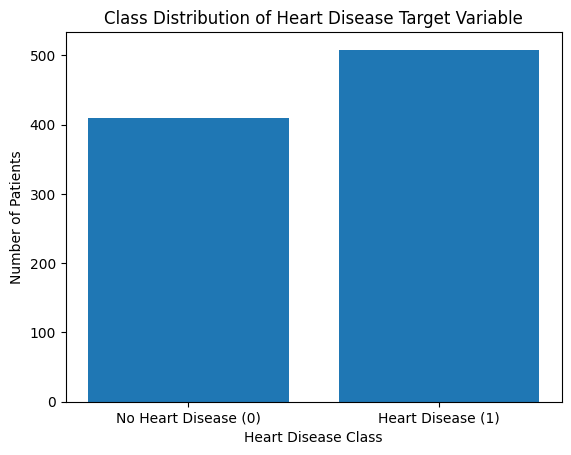

In [23]:
import matplotlib.pyplot as plt

# Create bar chart
plt.figure()
plt.bar(class_counts.index, class_counts.values)

# Labels
plt.xlabel("Heart Disease Class")
plt.ylabel("Number of Patients")
plt.title("Class Distribution of Heart Disease Target Variable")

# X-axis labels
plt.xticks([0, 1], ["No Heart Disease (0)", "Heart Disease (1)"])

plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


In [25]:
X = data.drop("Risk of AHD", axis=1)   # features
y = data["Risk of AHD"]                # label
print(data.head()) #ensuring cleaned data is in use for implementation.

        Age  Gender  RestingBP  Cholesterol  FastingBS  RestingECG     MaxHR  \
0 -1.433140       1   0.463654     0.886771  -0.551341           0  1.384080   
1 -0.478484       0   1.641229    -0.250184  -0.551341           0  0.754610   
2 -1.751359       1  -0.125133     0.824187  -0.551341           1 -1.527219   
3 -0.584556       0   0.345897     0.104463  -0.551341           0 -1.133801   
4  0.051881       1   1.052442    -0.093722  -0.551341           0 -0.583014   

   Exercise induced angina   Oldpeak  ST_Slope  Obesity  Diabetes  \
0                        0 -0.851276         0        1         0   
1                        0  0.118532         1        0         0   
2                        0 -0.851276         0        1         0   
3                        1  0.603436         1        0         1   
4                        0 -0.851276         0        0         1   

   Risk of AHD  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
0            0                 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)



In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)


Accuracy : 0.8478260869565217
Precision: 0.898989898989899
Recall   : 0.8317757009345794


In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [32]:
data = pd.read_csv('datacleaning.csv')

In [33]:
X = data.drop('Risk of AHD', axis=1)
y = data['Risk of AHD']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test)

In [38]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[66 11]
 [19 88]]


In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8369565217391305
Precision: 0.8888888888888888
Recall: 0.822429906542056


**DNN Impementaion**

In [40]:
# Cleaned dataset
data = pd.read_csv('datacleaning.csv')

In [41]:
#Features and target
X = data.drop('Risk of AHD', axis=1)
y = data['Risk of AHD']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(16, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5943 - loss: 0.6734 - val_accuracy: 0.7483 - val_loss: 0.5881
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.5545 - val_accuracy: 0.7959 - val_loss: 0.5025
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.4641 - val_accuracy: 0.8095 - val_loss: 0.4351
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8559 - loss: 0.3781 - val_accuracy: 0.8231 - val_loss: 0.4110
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8375 - loss: 0.3864 - val_accuracy: 0.8367 - val_loss: 0.4019
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8557 - loss: 0.3484 - val_accuracy: 0.8435 - val_loss: 0.3993
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8773 - loss: 0.3187 - val_accuracy: 0.8367 - val_loss: 0.3957
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8844 - loss: 0.2980 - val_accuracy: 0.8231 - val_loss

In [46]:
#Predict
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8315217391304348
Precision: 0.8877551020408163
Recall: 0.8130841121495327
Confusion Matrix:
 [[66 11]
 [20 87]]
